# Multiple Linear Regression on Diamonds Dataset

### Definition:

A polynomial regression model is a machine learning model that can capture non-linear relationships between variables by fitting a non-linear regression line, which may not be possible with simple linear regression. It is used when linear regression models may not adequately capture the complexity of the relationship. The relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.  Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear. It is considered to be a special case of multiple linear regression.

### The objective is to:
* Implement Multiple Linear Regression using Scikit Learn on the Utrecht Housing Dataset
* Use Multicollinearity function to to determine which independent features should be used in the process
* Create a model which will be trained and tested
* Evaluate the Model to know its efficiency in making predictions

#### Processes required to achieve the objective

* Data Understanding
* Import necessary libraries
* Data Importation using Pandas to create easily readable dataframe
* Exploration of Data - Checking general data overview using 'describe' amd 'info' 
* Data cleaning if necessary by removing redundant or empty data
* Data Visualisation (checking correlation) using matplotlib to create various plots 
* Use Multicollinearity function to help select features for the Model
* using randomness to partition the data into 80% and 20%
* using 80% of the data for training and the remaining 20% for testing
* Use plots to see the distribution of trained data and ascertain that data training has been achieved
* use sklearn to call out the Linear Model
* define our dependent and independent variables for the training model
* check the coefficients of the model
* plot the output of the training model using a specific feature to check if training was succesful
* Evaluate the model
* Remarks about observation 

### Understanding the Data

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

### Import Data

In [1]:
import pandas as pd # for reading data
import numpy as np # for doing vital mathematical operations
import matplotlib.pyplot as plt # for plotting graphs

In [2]:
df = pd.read_csv('diamonds.csv')

### Data Exploration

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250


In [4]:
df.describe()

,carat,depth,table,price,x,y,z,log_price,volume
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,7.786768,129.849403
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.014649,78.245262
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,5.786897,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,6.856462,65.136830
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,7.783641,114.808572
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,8.580027,170.842451
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,9.842835,3840.598060


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   x          53940 non-null  float64
 8   y          53940 non-null  float64
 9   z          53940 non-null  float64
 10  log_price  53940 non-null  float64
 11  volume     53940 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.9+ MB


In [6]:
df.isnull().values.any()

False

In [8]:
# during the exercise convert "cut" column to numeric i.e 1,2,3

In [7]:
df.corr()['price']

carat        0.921591
depth       -0.010647
table        0.127134
price        1.000000
x            0.884435
y            0.865421
z            0.861249
log_price    0.895771
volume       0.902385
Name: price, dtype: float64

In [13]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

### Initial Feature selection

In [11]:
newdf = df[['carat','x','y','z','volume','price']]

In [12]:
newdf.head()

,carat,x,y,z,volume,price
0,0.23,3.95,3.98,2.43,38.202030,326
1,0.21,3.89,3.84,2.31,34.505856,326
2,0.23,4.05,4.07,2.31,38.076885,327
3,0.29,4.20,4.23,2.63,46.724580,334
4,0.31,4.34,4.35,2.75,51.917250,335


### Data Preprocessing / Data Cleaning / Data Screening
* One of the main things to do when working on Mching Learning is to get the data ready for the process.
* In this case our data is clean and we dont have to do a lot in the preprocessing stage

### Data Visualisation

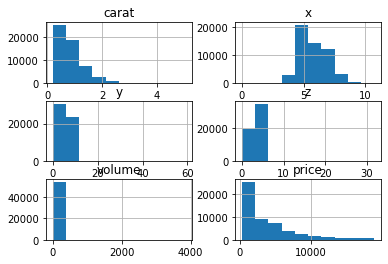

In [16]:
newdf.hist()
plt.show()

Text(0, 0.5, 'price')

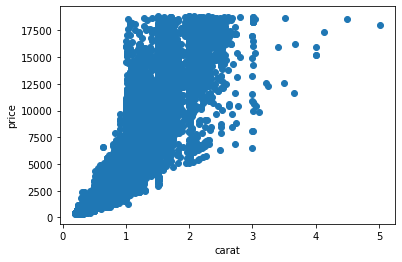

In [17]:
plt.scatter(newdf.carat, newdf.price)

# adding x and y lables to the plot
plt.xlabel("carat")
plt.ylabel("price")

Text(0, 0.5, 'price')

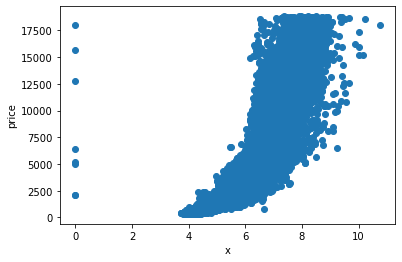

In [18]:
plt.scatter(newdf.x, newdf.price)

# adding x and y lables to the plot
plt.xlabel("x")
plt.ylabel("price")

Text(0, 0.5, 'price')

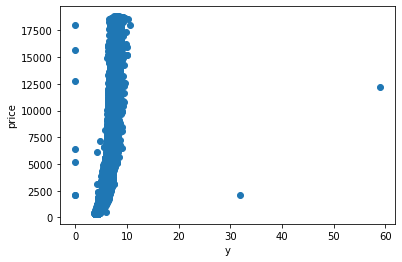

In [19]:
plt.scatter(newdf.y, newdf.price)

# adding x and y lables to the plot
plt.xlabel("y")
plt.ylabel("price")

Text(0, 0.5, 'price')

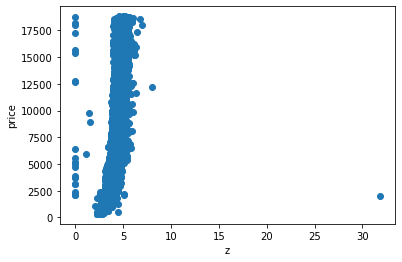

In [20]:
plt.scatter(newdf.z, newdf.price)

# adding x and y lables to the plot
plt.xlabel("z")
plt.ylabel("price")

Text(0, 0.5, 'price')

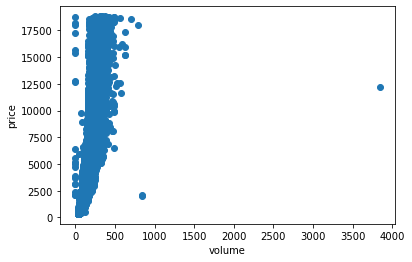

In [21]:
plt.scatter(newdf.volume, newdf.price)

# adding x and y lables to the plot
plt.xlabel("volume")
plt.ylabel("price")

### Feature Selection - final: Defining elements for our model using OLS

In [22]:
import statsmodels.api as sm

In [24]:
X =newdf[['carat','x','y','z','volume']]
y =newdf[['price']]

In [25]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 6.380e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:03   Log-Likelihood:            -4.7162e+05
No. Observations:               53940   AIC:                         9.433e+05
Df Residuals:                   53934   BIC:                         9.433e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2668.1033    109.284     24.414      0.000    2453.907    2882.300
carat       7636.4152    133.374     57.256      0.000    7375.001    7897.830
x            214.3739     64.055      3.347      0.001      88.826     339.922
y           -879.2118     53.922    -16.305      0.000    -984.899    -773.525
z           -976.1780     43.105    -22.647      0.000   -1060.664    -891.692
volume        18.7832      0.851     22.061      0.000      17.114      20.452
==============================================================================
Omnibus:                    14349.620   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           386858.686
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                      16.046   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
final_df = newdf[['carat','x','volume', 'price']]

In [28]:
final_df.head()

,carat,x,volume,price
0,0.23,3.95,38.202030,326
1,0.21,3.89,34.505856,326
2,0.23,4.05,38.076885,327
3,0.29,4.20,46.724580,334
4,0.31,4.34,51.917250,335


### From the feature selection process used above we can see that the feature carat has a high influence on the price so we use carat and price for our model

### Training and Testing Data

In [30]:
msk = np.random.rand(len(df)) < 0.8
train = final_df[msk]
test = final_df[~msk]

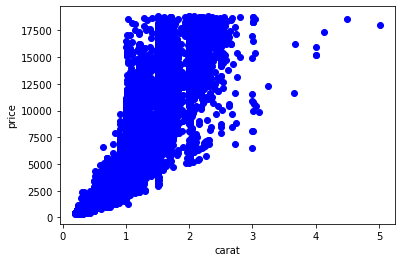

In [31]:
plt.scatter(train.carat, train.price,  color='blue')
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

### Model Creation

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['carat']])
train_y = np.asanyarray(train[['price']])

test_x = np.asanyarray(test[['carat']])
test_y = np.asanyarray(test[['price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.    , 0.23  , 0.0529],
       [1.    , 0.21  , 0.0441],
       [1.    , 0.23  , 0.0529],
       ...,
       [1.    , 0.72  , 0.5184],
       [1.    , 0.7   , 0.49  ],
       [1.    , 0.86  , 0.7396]])

In [35]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[   0.         6739.3835199   478.08765513]]
Intercept:  [-1855.56255222]


Text(0, 0.5, 'price')

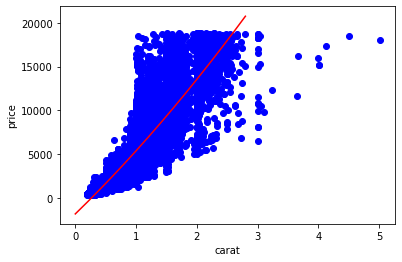

In [43]:
plt.scatter(train.carat, train.price,  color='blue')
XX = np.arange(0.0, 3.0, 0.2)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("carat")
plt.ylabel("price")

### Model Evaluation

In [40]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 949.38
Residual sum of squares (MSE): 2336634.21
R2-score: 0.85


### Remarks
* With a R2 score of 85% we can be confident in our model to be used for prediction
* Further work may require trying other features in the dataset
* further work may involve the use of more features for the model 